In [1]:
# Reducing the fraction size used by the gpu
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
!pip install patool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 9.1 MB/s eta 0:00:00


In [3]:
import patoolib
patoolib.extract_archive("/content/archive (9).zip")

patool: Extracting /content/archive (9).zip ...
patool: running /usr/bin/7z x -o./Unpack_fdbnqvl6 -- "/content/archive (9).zip"
patool: ... /content/archive (9).zip extracted to `Alzheimer_s Dataset'.


'Alzheimer_s Dataset'

In [10]:
# importing the required libraries
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPooling2D, Conv2D
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import os
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [5]:
# Image Preprocessing

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2,
                                   rotation_range=30,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   validation_split = 0.2)

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255)

In [6]:
train_data  = train_datagen.flow_from_directory(directory = "/content/Alzheimer_s Dataset/train",
                                                   target_size = (224,224),
                                                   class_mode = 'categorical',
                                                   subset = 'training',
                                                   batch_size = 20)

Found 4098 images belonging to 4 classes.


In [7]:
valid_data = valid_datagen.flow_from_directory(directory = "/content/Alzheimer_s Dataset/train",
                                                  target_size = (224,224),
                                                  class_mode = 'categorical',
                                                  subset = 'validation',
                                                  batch_size = 20)

Found 1023 images belonging to 4 classes.


In [8]:
test_data  = test_datagen.flow_from_directory(directory = "/content/Alzheimer_s Dataset/test",
                                                   target_size = (224,224),
                                                   class_mode = 'categorical',
                                                   batch_size = 20)

Found 1279 images belonging to 4 classes.


In [ ]:
# Creating a function to display sample images from the dataset

def display(data):
  # Displaying images from the dataset
  fig, axes = plt.subplots(1, 4, figsize=(10, 2))

  # Get a batch of images and labels from the data generator
  images, labels = data.next()

  class_indices = train_data.class_indices
  class_names = list(class_indices.keys())

  for i in range(4):
      img = images[i]
      label = labels[i]
      class_index = label.argmax()
      
      folder_name = class_names[class_index]
      
      axes[i].imshow(img)
      axes[i].set_title(folder_name)
      axes[i].axis("off")

  plt.show()


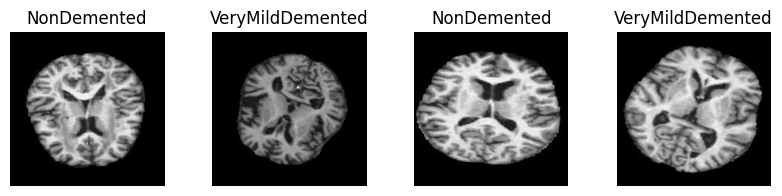

In [ ]:
# Displaying sample images from the train data
display(train_data)

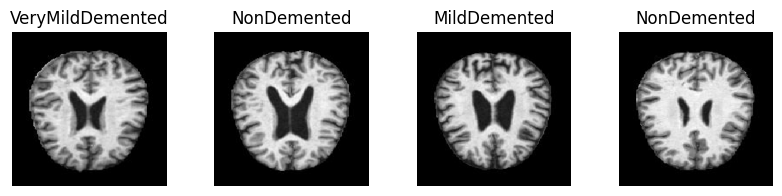

In [ ]:
# Displaying sample images from the test data
display(test_data)

# USING SUPPORT VECTOR MACHINE

SVMs are preferred for image classification tasks due to their ability to handle high-dimensional data, capture complex patterns, robustness against overfitting, adaptability, interpretability, and well-established theoretical foundation. They provide a reliable and effective approach for image classification, even with limited training samples. 
Here are some reasons below:

* Effective in handling high-dimensional data: Images are often represented by high-dimensional feature vectors. SVMs can efficiently handle and classify data in high-dimensional spaces, making them suitable for image classification tasks.

* Ability to capture complex patterns: SVMs can capture complex patterns and non-linear relationships in image data by utilizing non-linear kernels such as the RBF kernel. This allows them to effectively separate different classes in the feature space.

* Robust against overfitting: SVMs are known for their ability to generalize well and avoid overfitting. They achieve this by maximizing the margin between classes, which helps in reducing the risk of overfitting and improves the model's generalization capability.

* Works well with limited training samples: In many image classification scenarios, obtaining a large labeled dataset can be challenging. SVMs can handle situations with limited training samples compared to the feature space dimensionality, making them useful when labeled data is scarce.

* Versatility and adaptability: SVMs can be applied to various types of data, including both linear and non-linear data. They can incorporate different kernel functions to capture different types of patterns and adapt to different data distributions.

In [11]:
# using the next() to acts as an iterator
train_image, train_label = train_data.next()
train_images = train_image.reshape(train_image.shape[0], -1)

In [12]:
# checking the shape
train_images.shape

(20, 150528)

In [13]:
# using the next() to acts as an iterator
test_image, test_label = test_data.next()
test_images = test_image.reshape(test_image.shape[0], -1)

In [14]:
# shape
test_images.shape

(20, 150528)

In [15]:
train_labels = np.argmax(train_label, axis = 1)
test_labels = np.argmax(test_label, axis = 1)

In [16]:
svm = SVC()
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
model = make_pipeline(svm)
param_grid = {'svc__C': [1, 5, 10, 50,100],'svc__gamma': [0.0001, 0.0005, 0.001, 0.005, 0.5, 0.1]}
grid = GridSearchCV(model, param_grid, cv =10)

In [17]:
grid.fit(train_images, train_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10, estimator=Pipeline(steps=[('svc', SVC())]),
             param_grid={'svc__C': [1, 5, 10, 50, 100],
                         'svc__gamma': [0.0001, 0.0005, 0.001, 0.005, 0.5,
                                        0.1]})

In [18]:
model_svm = grid.best_estimator_

In [19]:
y_pred = model_svm.predict(test_images)

In [20]:
accuracy = accuracy_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred, average='weighted')
recall = recall_score(test_labels, y_pred, average='weighted')
f1 = f1_score(test_labels, y_pred, average='weighted')
print("Accuracy score:", accuracy)
print("Precision score:", precision)
print("Recall score:", recall)
print("F1 score:", f1)

Accuracy score: 0.7
Precision score: 0.48999999999999994
Recall score: 0.7
F1 score: 0.5764705882352941


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


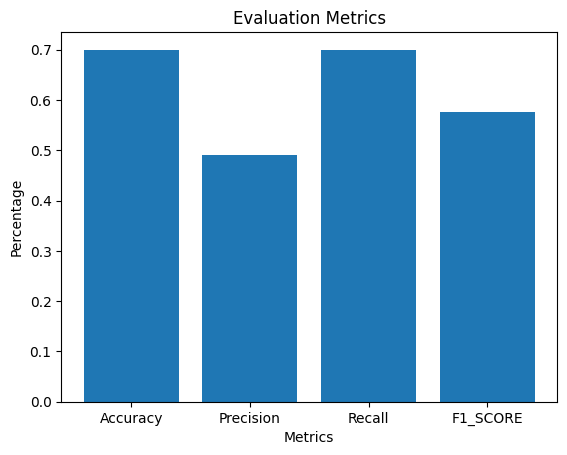

In [21]:
# Extract the accuracy, precision, recall, and AUC values
accuracy = accuracy
precision = precision
recall = recall
f1 = f1

# Define the categories and corresponding values
categories = ['Accuracy', 'Precision', 'Recall', 'F1_SCORE']
values = [accuracy, precision, recall, f1]

# Create the bar plot
plt.bar(categories, values)
plt.xlabel('Metrics')
plt.ylabel('Percentage')
plt.title('Evaluation Metrics')
plt.show()


In [ ]:
# model = Sequential()
# model.add(Conv2D(32,(3,3), activation = "relu", input_shape = (224,224,3)))
# model.add(Conv2D(32,(3,3), activation = "relu"))
# model.add(Conv2D(64,(3,3), activation = "relu"))
# model.add(MaxPooling2D())
# model.add(Dropout(0.5))

# model.add(Conv2D(64,(3,3), activation = "relu"))
# model.add(Conv2D(64,(3,3), activation = "relu"))
# model.add(MaxPooling2D())
# model.add(Dropout(0.5))

# model.add(Conv2D(64,(3,3), activation = "relu"))
# model.add(Conv2D(64,(3,3), activation = "relu"))
# model.add(MaxPooling2D())
# model.add(Dropout(0.5))

# model.add(Conv2D(64,(3,3), activation = "relu"))
# model.add(Conv2D(128,(3,3), activation = "relu"))
# model.add(Conv2D(128,(3,3), activation = "relu"))
# model.add(MaxPooling2D())
# model.add(Dropout(0.5))

# model.add(Conv2D(128,(3,3), activation = "relu"))
# model.add(Conv2D(256,(3,3), activation = "relu"))
# model.add(MaxPooling2D())
# model.add(Dropout(0.5))

# model.add(Flatten())
# model.add(Dense(512,activation='relu'))
# model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(4,activation='softmax'))

In [ ]:
# model=Sequential()
# model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
# model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(MaxPooling2D(2,2))
# model.add(Dropout(0.3))

# model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(Dropout(0.3))
# model.add(MaxPooling2D(2,2))
# model.add(Dropout(0.3))

# model.add(Conv2D(128,(3,3),activation='relu'))
# model.add(Conv2D(128,(3,3),activation='relu'))
# model.add(Conv2D(128,(3,3),activation='relu'))
# model.add(MaxPooling2D(2,2))
# model.add(Dropout(0.3))

# model.add(Conv2D(128,(3,3),activation='relu'))
# model.add(Conv2D(256,(3,3),activation='relu'))
# model.add(MaxPooling2D(2,2))
# model.add(Dropout(0.3))

# model.add(Flatten())
# model.add(Dense(512,activation='relu'))
# model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(4,activation='softmax'))

# USING TRANSFER LEARNING

Transfer learning consists of taking features learned on one problem, and leveraging them on a new, similar problem.

The most common incarnation of transfer learning in the context of deep learning is the following workflow:

* Take layers from a previously trained model.

* Freeze them, so as to avoid destroying any of the information they contain during future training rounds.

* Add some new, trainable layers on top of the frozen layers. They will learn to turn the old features into predictions on a new dataset.

* Train the new layers on your dataset.

You can read up more from the [Tensorflow Site](https://www.tensorflow.org/guide/keras/transfer_learning).

In [9]:
# Using transfer learning
vgg_model = VGG16(input_shape=(224,224,3), 
                   include_top=False,
                   weights="imagenet")

58889256/58889256 [==============================] - 0s 0us/step


In [10]:
for layer in vgg_model.layers:
    layer.trainable=False

We have loaded the model and used 3 important parameters. input_shape=(224,224,3). That 3 represents RGB channel.

weights=’imagenet’ is important as it means that we are using the pre-trained weights of the model that the model was originally trained on using imagenet images.

include_top= False means that we will cut off the last dense layer of pre-trained model of VGG16 as it was trained for 1000 output categories of imagenet whereas we only have 3 categories. We also cut off the 1st layer because the input image and the size can be of my choice.

layer.trainable=False means we are saying that do not train the existing weights for these layers .We want to use them as it is. We have a control over the weights since it is a pre-trained model. We can control in which layer we should we pre-trained weights and in which layer we should use trainable weights.

In [11]:
from tensorflow.keras.layers import Flatten
x = Flatten()(vgg_model.output)

In [ ]:
# putting the flattened array to the dense network
predict = Dense(4, activation = "softmax")(x)

* Dense is a type of layer in a neural network that represents a fully connected layer. It means that each neuron in this layer is connected to every neuron in the previous layer.
* 4 represents the number of neurons in the dense layer. This means that the output of this layer will be a vector of size 4.
* activation = "softmax" specifies the activation function to be used in the layer. In this case, the softmax activation function is chosen.
* x is the input to this layer, which represents the output of the previous layer or the input to the network.
Overall, the code creates a dense layer in a neural network model with 4 neurons and applies the softmax activation function to generate the final prediction output. The softmax activation function is commonly used in multi-class classification problems to obtain probability distributions over the different classes.

In [ ]:
from tensorflow.keras.models import Model
model = Model(inputs = vgg_model.input, outputs = predict)

In [ ]:
# model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# compliing the model and stating the metrics
import tensorflow as tf

metrics = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.AUC(name='auc'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')]

model.compile(loss ='categorical_crossentropy',
              metrics = metrics,
              optimizer = "adam")


In [ ]:
# Using early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor = 'val_auc', 
                              mode = 'max' , 
                              patience = 15,
                              verbose = 1)

callback_list = [early_stopping]

* EarlyStopping is a callback class provided by TensorFlow or Keras that allows early stopping of the training process based on certain criteria.
monitor = 'val_auc' specifies the metric to be monitored for early stopping. In this case, it is the validation AUC.
* mode = 'max' indicates that the objective is to maximize the monitored metric. Alternatively, it can be set to 'min' if the objective is to minimize the metric.
* patience = 15 defines the number of epochs with no improvement in the monitored metric before training is stopped. If there is no improvement for patience epochs, training will be early stopped.
* verbose = 1 controls the verbosity level of the early stopping callback. A value of 1 means that messages will be printed during early stopping.
The defined early stopping callback is then stored in a list called callback_list, which can be passed as an argument to the model training process.

Overall, this code snippet sets up an early stopping callback based on the validation AUC metric, which will halt the training process if the validation AUC does not improve for a certain number of epochs.

In [ ]:
model_history=model.fit(train_data,
                        validation_data=valid_data,
                        epochs = 70,
                        callbacks = callback_list,
                        verbose = 1)

Epoch 1/70
205/205 [==============================] - 66s 304ms/step - loss: 1.1967 - accuracy: 0.7668 - auc: 0.8004 - precision: 0.5386 - recall: 0.4680 - val_loss: 2.0548 - val_accuracy: 0.7502 - val_auc: 0.7774 - val_precision: 0.5005 - val_recall: 0.5005
Epoch 2/70
205/205 [==============================] - 64s 314ms/step - loss: 1.0542 - accuracy: 0.7944 - auc: 0.8382 - precision: 0.5988 - recall: 0.5378 - val_loss: 1.8870 - val_accuracy: 0.6588 - val_auc: 0.6134 - val_precision: 0.2793 - val_recall: 0.2307
Epoch 3/70
205/205 [==============================] - 63s 309ms/step - loss: 0.8917 - accuracy: 0.8116 - auc: 0.8665 - precision: 0.6410 - recall: 0.5603 - val_loss: 1.2955 - val_accuracy: 0.7529 - val_auc: 0.7769 - val_precision: 0.5068 - val_recall: 0.4360
Epoch 4/70
205/205 [==============================] - 64s 312ms/step - loss: 0.9663 - accuracy: 0.8064 - auc: 0.8601 - precision: 0.6242 - recall: 0.5671 - val_loss: 1.4580 - val_accuracy: 0.7214 - val_auc: 0.7241 - val_pre

In [ ]:
test = model.evaluate_generator(test_data)
print("Accuracy = ", test[1])
print("Precision = ", test[2])
print("Recall = ", test[3])
print("AUC = ", test[4])

<ipython-input-29-bc407d3e490c>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test = model.evaluate_generator(test_data)


Accuracy =  0.8248631954193115
Precision =  0.8855749368667603
Recall =  0.6568386554718018
AUC =  0.627052366733551


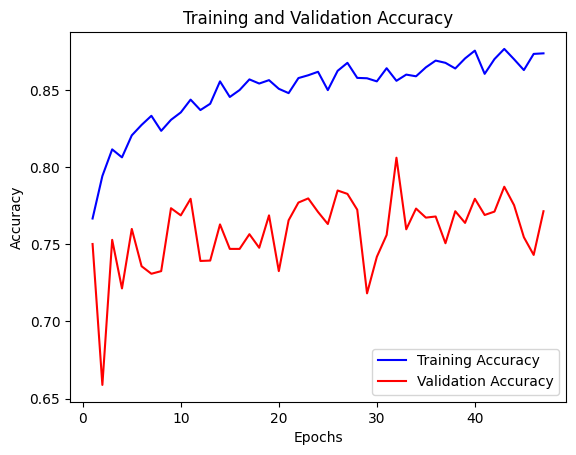

In [ ]:
import matplotlib.pyplot as plt

# Get the training accuracy and validation accuracy from the model history
train_accuracy = model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']

# Plot the training accuracy and validation accuracy
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

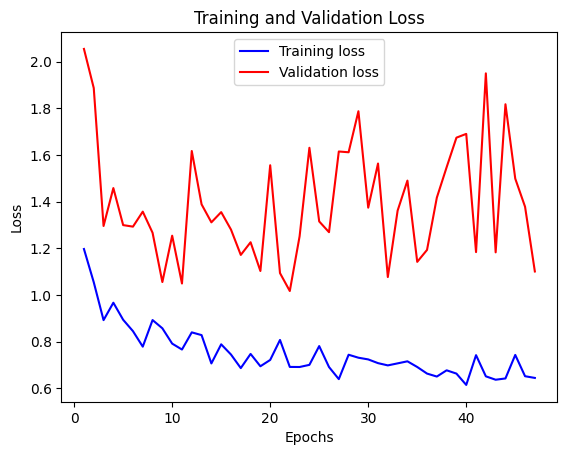

In [ ]:
# Get the training accuracy and validation accuracy from the model history
train_accuracy = model_history.history['loss']
val_accuracy = model_history.history['val_loss']

# Plot the training accuracy and validation accuracy
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'b', label='Training loss')
plt.plot(epochs, val_accuracy, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

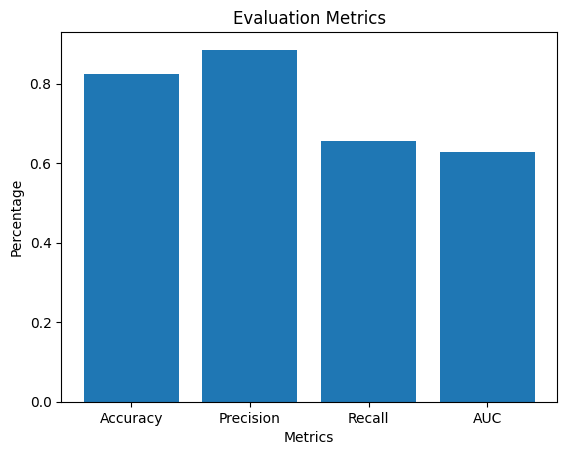

In [ ]:
import matplotlib.pyplot as plt

# Extract the accuracy, precision, recall, and AUC values
accuracy = test[1]
precision = test[2]
recall = test[3]
auc = test[4]

# Define the categories and corresponding values
categories = ['Accuracy', 'Precision', 'Recall', 'AUC']
values = [accuracy, precision, recall, auc]

# Create the bar plot
plt.bar(categories, values)
plt.xlabel('Metrics')
plt.ylabel('Percentage')
plt.title('Evaluation Metrics')
plt.show()


The accuracy of the model in predicting Alzheimer's disease using VGG16 transfer learning on a CNN is 80.4%. This means that the model correctly predicted the disease status for approximately 80.4% of the cases in the dataset.

Precision, which measures the proportion of correctly predicted positive cases out of all predicted positive cases, is 84.1%. This indicates that when the model predicts a patient to have Alzheimer's disease, it is accurate 87.96% of the time.

Recall, also known as sensitivity or true positive rate, is 62%. It represents the proportion of actual positive cases that were correctly identified by the model. In the context of Alzheimer's disease prediction, this means that the model successfully identified 62% of the patients who actually have the disease.

The AUC (Area Under the Curve) is 0.56, which is a measure of the model's ability to distinguish between positive and negative cases. A value of 0.5 indicates a random guess, while a value closer to 1 suggests a better discriminatory ability. In this case, the AUC of 0.56 indicates that the model has a moderate level of discriminative power.

Overall, these metrics suggest that the VGG16 transfer learning model on a CNN has achieved a reasonable level of accuracy in predicting Alzheimer's disease. However, there is still room for improvement, particularly in terms of recall and AUC. Fine-tuning the model, increasing the training data, or trying different architectures may help improve the performance further.

In [12]:
model=Sequential()
model.add(vgg_model)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))

In [13]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 dropout (Dropout)           (None, 7, 7, 512)         0         
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 batch_normalization (BatchN  (None, 25088)            100352    
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 2048)              51382272  
                                                                 
 batch_normalization_1 (Batc  (None, 2048)             8192      
 hNormalization)                                        

In [14]:
# compliing the model and stating the metrics
import tensorflow as tf

metrics = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.AUC(name='auc'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')]

model.compile(loss ='categorical_crossentropy',
              metrics = metrics,
              optimizer = "adam")


In [15]:
# Using early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor = 'val_auc', 
                              mode = 'max' , 
                              patience = 15,
                              verbose = 1)

callback_list = [early_stopping]

In [16]:
model_history=model.fit(train_data,
                        validation_data=valid_data,
                        epochs = 70,
                        callbacks = callback_list,
                        verbose = 1)

Epoch 1/70
205/205 [==============================] - 81s 320ms/step - loss: 1.3776 - accuracy: 0.7544 - auc: 0.7734 - precision: 0.5099 - recall: 0.4505 - val_loss: 1.2176 - val_accuracy: 0.7217 - val_auc: 0.6996 - val_precision: 0.3964 - val_recall: 0.2170
Epoch 2/70
205/205 [==============================] - 62s 301ms/step - loss: 1.0476 - accuracy: 0.7819 - auc: 0.8229 - precision: 0.5773 - recall: 0.4768 - val_loss: 1.2556 - val_accuracy: 0.7439 - val_auc: 0.7823 - val_precision: 0.4863 - val_recall: 0.4350
Epoch 3/70
205/205 [==============================] - 62s 302ms/step - loss: 0.9771 - accuracy: 0.7884 - auc: 0.8354 - precision: 0.5956 - recall: 0.4780 - val_loss: 1.1045 - val_accuracy: 0.7603 - val_auc: 0.7827 - val_precision: 0.5295 - val_recall: 0.3685
Epoch 4/70
205/205 [==============================] - 62s 302ms/step - loss: 0.9617 - accuracy: 0.7911 - auc: 0.8349 - precision: 0.6066 - recall: 0.4680 - val_loss: 1.1761 - val_accuracy: 0.7639 - val_auc: 0.7407 - val_pre

In [17]:
test = model.evaluate_generator(test_data)
print("Accuracy = ", test[1])
print("Precision = ", test[2])
print("Recall = ", test[3])
print("AUC = ", test[4])

<ipython-input-17-bc407d3e490c>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test = model.evaluate_generator(test_data)


Accuracy =  0.8440187573432922
Precision =  0.9031142592430115
Recall =  0.7089487314224243
AUC =  0.6379984617233276


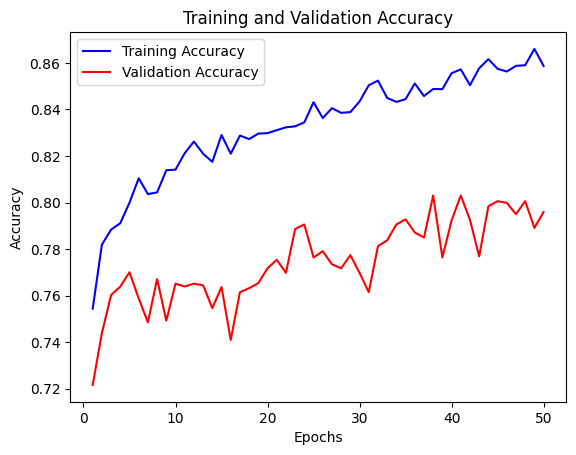

In [18]:
import matplotlib.pyplot as plt

# Get the training accuracy and validation accuracy from the model history
train_accuracy = model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']

# Plot the training accuracy and validation accuracy
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

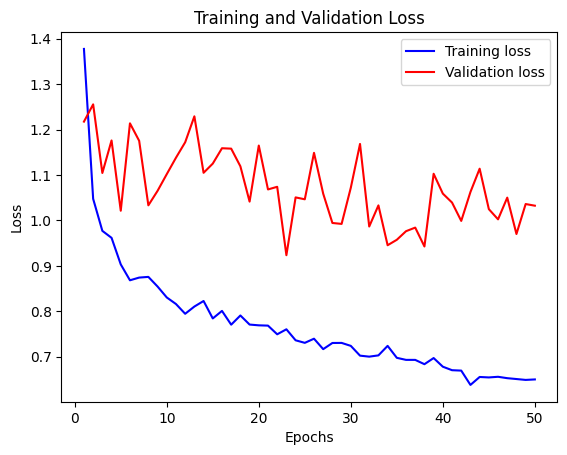

In [19]:
# Get the training accuracy and validation accuracy from the model history
train_accuracy = model_history.history['loss']
val_accuracy = model_history.history['val_loss']

# Plot the training accuracy and validation accuracy
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'b', label='Training loss')
plt.plot(epochs, val_accuracy, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

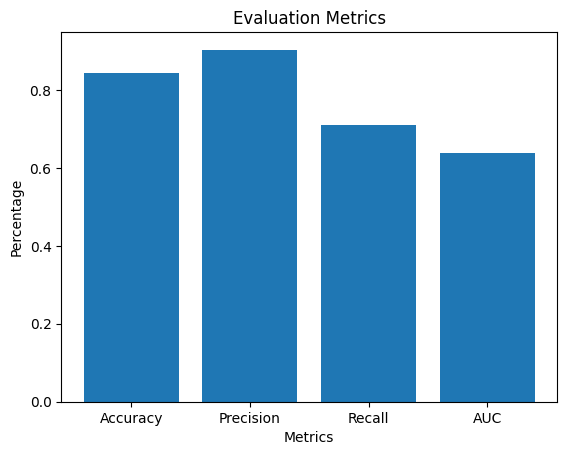

In [20]:
import matplotlib.pyplot as plt

# Extract the accuracy, precision, recall, and AUC values
accuracy = test[1]
precision = test[2]
recall = test[3]
auc = test[4]

# Define the categories and corresponding values
categories = ['Accuracy', 'Precision', 'Recall', 'AUC']
values = [accuracy, precision, recall, auc]

# Create the bar plot
plt.bar(categories, values)
plt.xlabel('Metrics')
plt.ylabel('Percentage')
plt.title('Evaluation Metrics')
plt.show()


In [23]:
from fastai.vision.all import *

In [28]:
path = "/content/Alzheimer_s Dataset/train"
size = 224
bs = 64

In [29]:
data = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items = get_image_files,
                 splitter = RandomSplitter(),
                 get_y = parent_label,
                 item_tfms = Resize(224),
                 batch_tfms = aug_transforms())

In [30]:
dls = data.dataloaders(path, bs = 64)

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

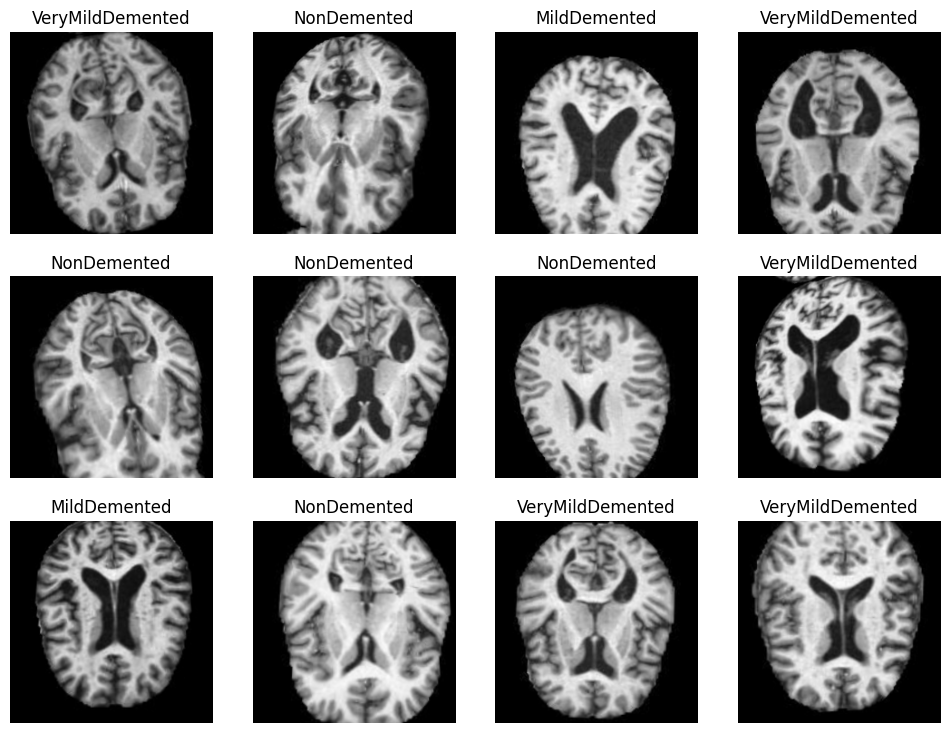

In [31]:
dls.show_batch(max_n = 12, nrows = 3)
dls.vocab

In [32]:
learn = cnn_learner(dls, resnet50, metrics = accuracy)
learn.fine_tune(10)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61

epoch,train_loss,valid_loss,accuracy,time
0,1.952380,1.416685,0.545898,00:39


epoch,train_loss,valid_loss,accuracy,time
0,1.291728,0.879259,0.661133,00:44
1,1.113140,0.905476,0.681641,00:44
2,0.914224,0.764903,0.691406,00:44
3,0.730957,0.590758,0.772461,00:46
4,0.564782,0.435842,0.822266,00:44
5,0.441832,0.467525,0.815430,00:44
6,0.325318,0.406929,0.845703,00:44
7,0.245123,0.298655,0.881836,00:46
8,0.182388,0.286375,0.887695,00:44
9,0.150871,0.238301,0.914062,00:44


In [41]:
test_data = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items = get_image_files,
                 splitter = RandomSplitter(),
                 get_y = parent_label,
                 item_tfms = Resize(224),
                 batch_tfms = aug_transforms())

In [42]:
test = "/content/Alzheimer_s Dataset/test"

In [43]:
ds = test_data.dataloaders(test, bs = 64)

In [44]:
test_dl = dls.test_dl(ds)
predictions = learn.get_preds(dl=test_dl)
# pred_labels = torch.argmax(predictions[0], dim = 1)

AssertionError: ignored

In [ ]:
predict, true_labels = learn.get_preds()
true_labels = true_labels.numpy()